# **Restaurent Data Analysis - Level 1**



In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

**Dataset Loading**

In [ ]:
# Load Datasset
df = pd.read_csv('/content/Dataset .csv')

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
# Dataset Rows and Columns count
print("Number of rows :",df.shape[0])
print("Number of Columns :",df.shape[1])

Number of rows : 9551
Number of Columns : 21


**Data Cleaning**

In [ ]:
#Duplicate Values

dup_val = df.duplicated().sum()
print("Number of Duplicated rows:", dup_val)

Number of Duplicated rows: 0


In [ ]:
# Missing Values / Null Values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Cuisins column have 9 missing values

In [ ]:
# Handling Missing Values
#since,cuisine columns have low number of missing values,i.e 9
df = df.dropna(subset=['Cuisines'])

In [ ]:
# Checking missing/Null values after handling
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Data Type Conversion

In [ ]:
#Checing Dataset information using info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

Everything in order there is no need of datatype conversion

**Distribution of the Target**  **Variable**

In [ ]:
# Distribution of the target variable ("Aggregate rating") and identify class imbalance
target_counts = df['Aggregate rating'].value_counts()
print("Distribution of target variable:")
print(target_counts)

Distribution of target variable:
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


# **Task 1: Top Cuisines**

In [ ]:
# Determine the top three most common cuisines in the dataset.
Top_3_common_cuisines = df['Cuisines'].value_counts().head(3)
print(Top_3_common_cuisines)


North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64


In [ ]:
#Calculate the percentage of restaurants that serve each of the top
total_restaurents = len(df)
# find tha top three most common cuisines
Top_cuisines = df['Cuisines'].value_counts().head(3)

# calculate the percentage of restaurents serving each top cuisine
percentage_per_cuisines = (Top_cuisines / len(df)) * 100
print("percentage of restaurants that serve most common cuisines:")
print(percentage_per_cuisines)

percentage of restaurants that serve most common cuisines:
North Indian             9.809264
North Indian, Chinese    5.355271
Chinese                  3.709914
Name: Cuisines, dtype: float64


# **Task 2**: **City Analysis**

**Identify the city with the highest number of restaurants in the dataset.**

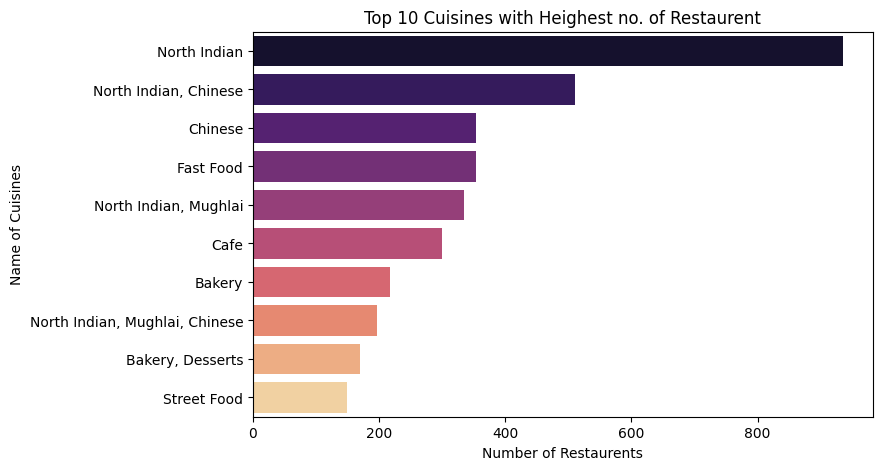

In [ ]:
#Identify the city with the highest number of restaurants in the dataset.

plt.figure(figsize=(8,5))
sns.countplot(y = df['Cuisines'],order=df.Cuisines.value_counts().iloc[:10].index, palette='magma')
plt.xlabel("Number of Restaurents")
plt.ylabel("Name of Cuisines")
plt.title("Top 10 Cuisines with Heighest no. of Restaurent")
plt.show()

**Calculate the average rating for restaurants in each city**

In [ ]:
#Calculate the average rating for restaurants in each city.
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean()

print("Average rating for restaurants in each city:")
print(average_rating_by_city)

Average rating for restaurants in each city:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64


**Calculate the average rating for restaurants in each city**

In [ ]:
# Calculate the average rating for restaurants in each city
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean()
print(average_rating_by_city)


City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64


**Calculate the average rating for restaurants in each city**

In [ ]:
# # Calculate the average rating for restaurants in each city
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean()

# Find the city with the highest average rating
city_highest_average_rating = average_rating_by_city.idxmax()
heighest_average_rating = average_rating_by_city.max()
print(f"The city with the highest average rating is {city_highest_average_rating}")
print("The heighest average rating is:",heighest_average_rating )

The city with the highest average rating is Inner City
The heighest average rating is: 4.9


# **Task 3: Price Range Distribution**

**Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.**

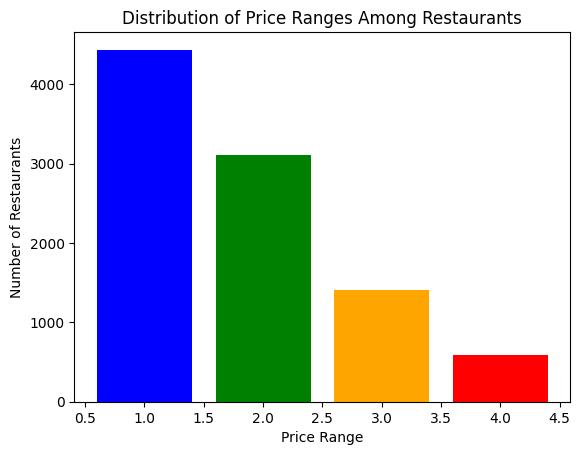

In [ ]:
#Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

price_counts = df['Price range'].value_counts()

# Plotting the bar chart
plt.bar(price_counts.index, price_counts.values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.show()



In [ ]:
#Calculate the percentage of restaurants in each price range category.
price_percentage = df['Price range'].value_counts(normalize=True) * 100

print("Percentage of restaurants in each price range:")
print(price_percentage)

Percentage of restaurants in each price range:
1    46.510166
2    32.624188
3    14.724376
4     6.141270
Name: Price range, dtype: float64


# **Task 4 : Online Delievery**

**Determine the percentage of restaurants that offer online delivery.**

In [ ]:
#Determine the percentage of restaurants that offer online delivery.
df['Has Online delivery'].value_counts()

No     7091
Yes    2451
Name: Has Online delivery, dtype: int64

In [ ]:
total_restaurents = len(df)
restaurents_with_online_delivery = df['Has Online delivery'].value_counts().get('Yes',0)

#calculate the percentage of restaurents that offer online delievery
percentage_online_delivery = (restaurents_with_online_delivery / total_restaurents)*100
print("percentage of restaurents that offer online delivery:", percentage_online_delivery)

percentage of restaurents that offer online delivery: 25.686438901697755
